In [1]:
# 데이터 출처: https://archive.ics.uci.edu/dataset/222/bank+marketing
# Github 출처: https://github.com/uci-ml-repo/ucimlrepo

#기본 모듈 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# warning을 모두 무시하는 것은 좋지 않으나 과제 수행을 쉽게할 수 있도록 무시설정
import warnings
warnings.filterwarnings(action='ignore')

## 문제1: 라이브러리를 통해 데이터 불러오기
- 다음코드는 데이터를 불러오고 df 변수명에 저장하는 코드입니다.
- github 문서를 읽고 데이터를 요청하여 로컬환경에 저장해보세요

In [2]:
'''문제 시작'''
from ucimlrepo import fetch_ucirepo

df = fetch_ucirepo(id=222)
df = df.data.original
df.to_csv('bank_marketing.csv', index=False)
'''문제 끝'''
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


## 데이터 정보:포르투갈 은행 기관의 마케팅 캠페인 데이터.

- 회사는 전화를 통해 고객에게 두번 이상 상품을 구독할건지 안할건지 연락합니다.
- 데이터셋의 목표는 고객이 정기 예금 상품을 구독할지 안할지를 다른 변수로 예측하는 것입니다.

- age : 나이
- job : 직업
- marital : 결혼유무
- education : 교육
- default : credit default swap 유무 (신용부도 위험을 서로 교환하는 거래)
- balance : 통장잔고
- housing : 주택대출 유무
- loan : 대출 유무
- contact : 연락처 종류
- day_of_week : 최근 연락한 요일
- month: 최근 연락한 달
- duration : 전화 받은 시간(초). 이 속성은 y 값에 높은 영향력을 지니기 때문에 정확한 모델 구축이 목표라면 **변수에 포함시키지 말아야 합니다**. 
- campaign: 현 캠페인 당시 전화 한 횟수
- pdays: 현 캠페인 전화 이후 현재까지의 일수
- previous:  전 캠페인 전화 횟수
- poutcome: 전 캠페인 결과. 구독 유무
- y: 구독 유무

In [3]:
#결측치
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#job, education, contact, poutcome 결측치 관찰 --> 전부 범주형 데이터!
job_na = df['job'].isna().sum()
edu_na = df['education'].isna().sum()
conta_na = df['contact'].isna().sum()
pout_na = df['poutcome'].isna().sum()
"Null sum : job {job_na}, edu {edu_na}, contact {conta_na}, pout {pout_na}".format(job_na=job_na,
                                                                                   edu_na=edu_na,
                                                                                   conta_na=conta_na,
                                                                                   pout_na=pout_na)

'Null sum : job 288, edu 1857, contact 13020, pout 36959'

In [5]:
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [6]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [7]:
df.education.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [8]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [9]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [10]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df.contact.unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [12]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [13]:
df.poutcome.unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

좋은 성능을 가진 모델 구축이 목표이기에 duration 변수를 제거해야 합니다. 또한 결측치 제거가 모델에 어떤 영향을 끼치는지 아직 모르기 때문에 결측치 제거는 따로 하지 않는게 좋을 것 같습니다.

## 데이터 전처리 & EDA 간단히

In [14]:
#데이터 불러오기 
df = pd.read_csv('./bank_marketing.csv')

# 제공받은 데이터를 train, test로 분리
X = df.drop(columns = ['y'])
y = df[['y']]

# 학습과 평가를 위해 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)
numeric_col = ['age','balance','day_of_week','duration','campaign','pdays','previous']
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']

#분리된 데이터 차원 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33908, 16) (11303, 16) (33908, 1) (11303, 1)


In [15]:
X_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,33908.000000,33688,33908,32522,33908,33908.000000,33908,33908,24180,33908.000000,33908,33908.000000,33908.000000,33908.000000,33908.000000,6153
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,7369,20445,17376,33306,NaN,18891,28471,22000,NaN,10310,NaN,NaN,NaN,NaN,3645
mean,40.907957,NaN,NaN,NaN,NaN,1362.457709,NaN,NaN,NaN,15.825233,NaN,258.473015,2.759555,40.024979,0.582635,NaN
std,10.620338,NaN,NaN,NaN,NaN,3052.176471,NaN,NaN,NaN,8.339007,NaN,258.936344,3.094060,100.018015,2.445884,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,451.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1432.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


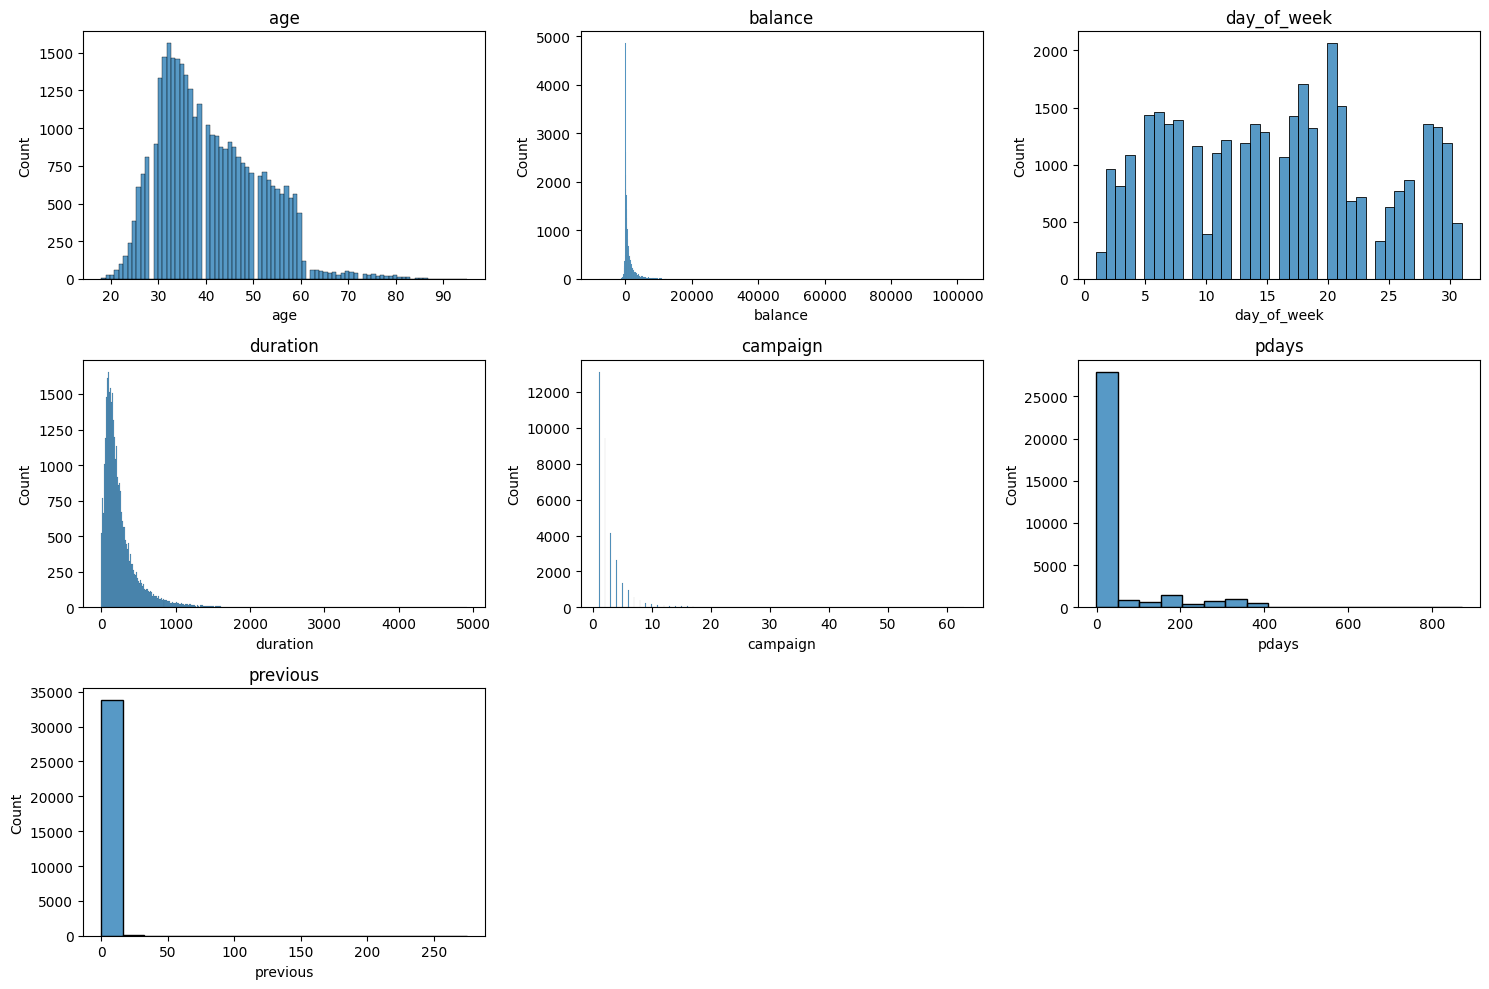

In [16]:
#수치형 변수 시각화
def get_3_hist(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)
        

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
get_3_hist(X_train, numeric_col)

In [17]:
# 이상치가 많은 컬럼에 대해서 로그스케일 적용

#balance 값 보정
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 로그스케일 적용
for col in ['duration','balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [18]:
X_train.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.907957,9.118624,15.825233,5.172125,2.759555,40.024979,0.225184
std,10.620338,0.214213,8.339007,0.922256,3.094060,100.018015,0.533092
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.998878,8.000000,4.644391,1.000000,-1.000000,0.000000
50%,39.000000,9.044404,16.000000,5.198497,2.000000,-1.000000,0.000000
75%,48.000000,9.153982,21.000000,5.765191,3.000000,-1.000000,0.000000
max,95.000000,11.609571,31.000000,8.500861,63.000000,871.000000,5.620401


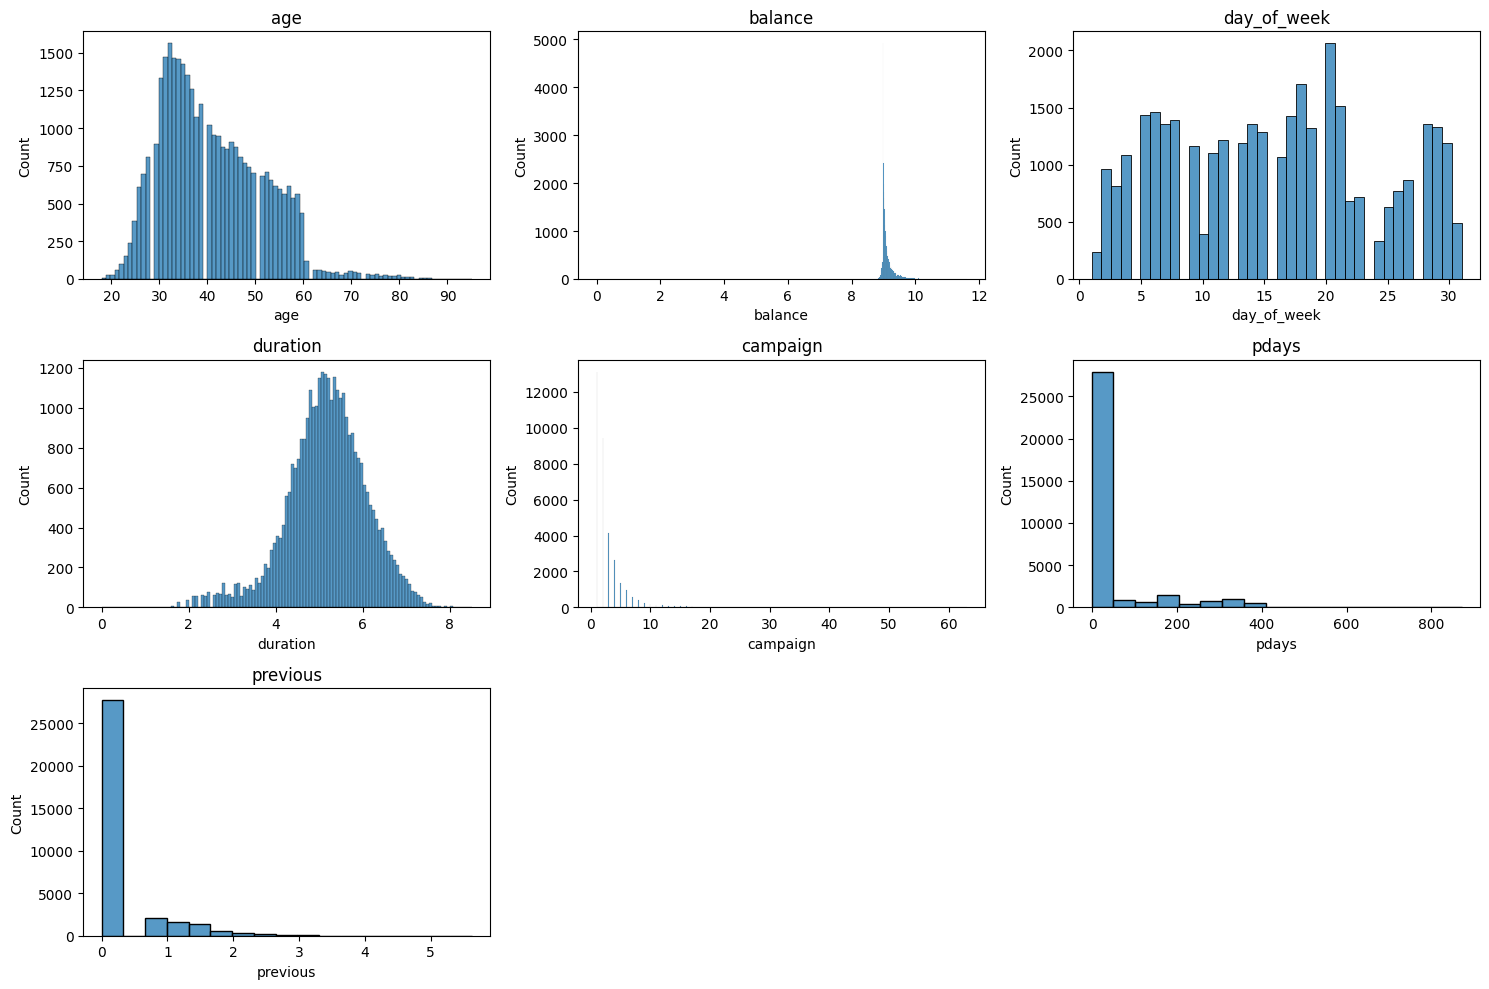

In [19]:
#로그스케일 변환 후 시각화
get_3_hist(X_train, numeric_col)

## 문제 2: Y 변수 인코딩 적용하기 
- Y 라벨을 no,yes를 사용자 정의함수와 apply를 이용하여 0,1로 인코딩 하세요
- 함수명은 get_binary로 설정하세요.
- Pandas docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [20]:
'''문제 시작'''

def get_binary(x):
    """
    주어진 문자열 x가 'no'일 경우 0을 반환하고, 그렇지 않을 경우 1을 반환합니다.
    이 함수는 일반적으로 두 가지 범주(예: 'yes'와 'no')를 가진 데이터를 이진 형식(0과 1)으로 변환하는 데 사용됩니다.

    Args:
        x (str): 변환할 문자열. 'no' 또는 그 외의 값을 가질 수 있습니다.
    Returns:
        int: 문자열 x가 'no'일 경우 0, 그렇지 않을 경우 1을 반환합니다.
    """
    # 이부분을 작성해주세요
    if x == 'no':
        return 0
    else:
        return 1
    
# y_train 데이터 인코딩 코드
y_train['y'] = y_train['y'].apply(get_binary)
# y_test 데이터 인코딩코드
y_test['y'] = y_test['y'].apply(get_binary)
'''문제 끝'''
#잘 적용되었는지 확인
display(y_train[:10])


,y
24915,0
11794,0
1279,0
913,0
5554,0
24126,1
38658,0
5469,0
14012,0
15788,0


## 문제3: 간단한 모델링 & 평가함수 생성하기
- 평가하기 위한 다음 함수를 완성하세요
- 필요한 모듈율 불러오고, 학습시키고, 결과를 저장하세요
    - y_pred_train : 훈련데이터 예측결과 변수
    - y_pred_test: 테스트데이터 예측결과 변수

In [21]:
def get_score(train:pd.DataFrame,  test:pd.DataFrame, x_var_list:list):
    """ train과 test 데이터와 X변수 컬럼을 받아 평가지표를 내는 함수입니다.

    Args:
        train (pd.DataFrame): train 데이터프레임
        test (pd.DataFrame): test 데이터프레임
        x_var_list (list): 모델링에 사용할 변수 리스트
    """
    #외부 전달인자를 내부변수에 할당
    X_train = train 
    X_test = test

    #일부 컬럼만 가져오기
    X_train = X_train[x_var_list]
    X_test = X_test[x_var_list]
    
    '''문제 시작'''
    #모듈불러오기
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    
    from sklearn.metrics import accuracy_score, f1_score
    #모델가져오기 & 학습하기
    model_lor = LogisticRegression()
    model_dt = DecisionTreeClassifier(random_state=42)
    model_rf = RandomForestClassifier(random_state=42)
    model_lor.fit(X_train, y_train)
    model_dt.fit(X_train, y_train)
    model_rf.fit(X_train, y_train)
    
    # 학습하여 결과 저장
    lor_y_pred_train = model_lor.predict(X_train)
    lor_y_pred_test = model_lor.predict(X_test)
    dt_y_pred_train = model_dt.predict(X_train)
    dt_y_pred_test = model_dt.predict(X_test)
    rf_y_pred_train = model_rf.predict(X_train)
    rf_y_pred_test = model_rf.predict(X_test)
    
    '''문제 끝'''
    
    #평가표 생성
    lor_result = pd.DataFrame({'acc' : [accuracy_score(y_train, lor_y_pred_train), accuracy_score(y_test, lor_y_pred_test)],
                            'f1_score' : [f1_score(y_train, lor_y_pred_train), f1_score(y_test, lor_y_pred_test)]},
                            index = ['train','test'])
    dt_result = pd.DataFrame({'acc' : [accuracy_score(y_train, dt_y_pred_train), accuracy_score(y_test, dt_y_pred_test)],
                            'f1_score' : [f1_score(y_train, dt_y_pred_train), f1_score(y_test, dt_y_pred_test)]},
                            index = ['train','test'])
    rf_result = pd.DataFrame({'acc' : [accuracy_score(y_train, rf_y_pred_train), accuracy_score(y_test, rf_y_pred_test)],
                            'f1_score' : [f1_score(y_train, rf_y_pred_train), f1_score(y_test, rf_y_pred_test)]},
                            index = ['train','test'])
    print("Logistic Regression")
    display(lor_result.round(2))
    
    print("Decision Tree")
    display(dt_result.round(2))
    
    print("Random Forest")
    display(rf_result.round(2))

# duration 변수만 사용하여 결과내기
get_score(X_train, X_test, ['duration'])

Logistic Regression


,acc,f1_score
train,0.89,0.23
test,0.89,0.20


Decision Tree


,acc,f1_score
train,0.90,0.34
test,0.88,0.19


Random Forest


,acc,f1_score
train,0.90,0.38
test,0.88,0.24


## 문제4: 모델링 수행하기
- 전체 변수를 가공하여 예측모델링을 수행하는 함수 get_numeric_sc를 완성해보세요

In [22]:
def get_numeric_sc(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """데이터를 전달받아 수치형 변수 스케일링하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrame: train, test 데이터프레임
    """
    # 수치형변수
    # age, balance, day_of_week, duration, campaign, pdays,previous
    
    #StandardScaler 적용할 변수 리스트
    sc_col = ['pdays','previous']
    #MinMaxScaler 적용할 변수 리스트
    mm_col = ['age','duration','day_of_week','balance','campaign']
    
    '''문제 시작'''
    #모듈 불러오기
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    #모델 가져오기
    sd_sc = StandardScaler()
    mm_sc = MinMaxScaler()

    #train, test 데이터변환(Standard Scaler이용)
    sd_sc.fit(X_train[sc_col])
    X_train[sc_col] = sd_sc.transform(X_train[sc_col])
    X_test[sc_col] = sd_sc.transform(X_test[sc_col])
    #train, test 데이터변환(MinMax Scaler이용)
    mm_sc.fit(X_train[mm_col])
    X_train[mm_col] = mm_sc.transform(X_train[mm_col])
    X_test[mm_col] = mm_sc.transform(X_test[mm_col])
    
    '''문제 끝'''
    return X_train, X_test

X_train, X_test = get_numeric_sc(X_train, X_test)

In [23]:
# 수치형 변수를 이용한 학습&평가
get_score(X_train, X_test, numeric_col)

Logistic Regression


,acc,f1_score
train,0.89,0.25
test,0.88,0.22


Decision Tree


,acc,f1_score
train,1.00,1.00
test,0.85,0.37


Random Forest


,acc,f1_score
train,1.00,1.00
test,0.89,0.41


## 범주형 변수 인코딩
### job, month 변수 Label Encoder 적용
- job 변수는 11개의 카테고리, month 변수는 12개의 카테고리를 가지기 때문에 더미 변수화 과정에서 dimensionality 가 증가하면서 차원의 저주에 걸릴 위험이 있습니다.?
- 이를 방지하기 위해 두 변수는 label encoding 을 적용합니다.

### Dummy Variable Trap 확인하기
- 더미 변수들 중 다중공선성을 가지는 변수가 존재하면 dummy variable trap 에 빠질 위험이 있습니다.
- 이를 방지하기 위해 변수의 상관관계를 파악하고 상관계수가 높은 변수를 인코딩에서 drop 시킵니다.

<Axes: >

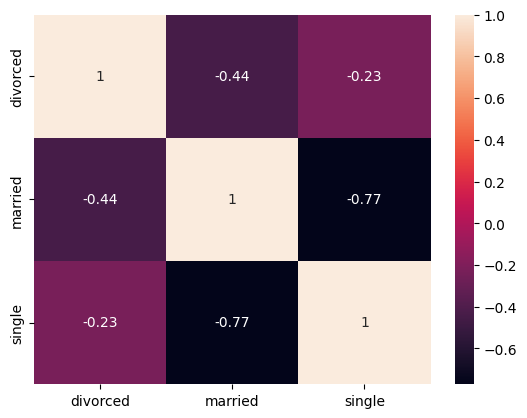

In [24]:
job_dummies = pd.get_dummies(df['marital'])
corr = job_dummies.corr(method='pearson')
sns.heatmap(corr, annot=True)
# drop single

- martial 변수의 married, single 은 -0.77의 높은 음의 상관관계를 가집니다. 싱글이면 결혼하지 않았다는 뜻이니 당연합니다. 인코딩 과정에서 single 변수를 제거해 multicolinearity 를 방지합니다.

<Axes: >

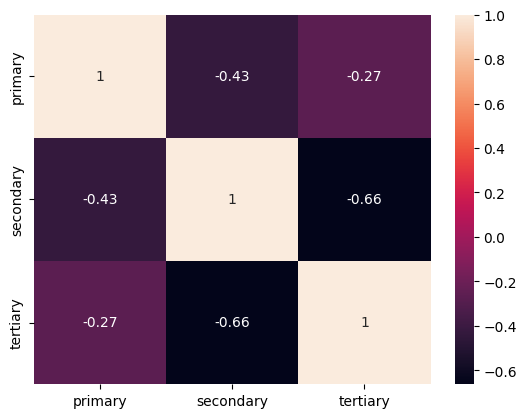

In [25]:
job_dummies = pd.get_dummies(df['education'])
corr = job_dummies.corr(method='pearson')
sns.heatmap(corr, annot=True)
#drop secondary

- education 변수의 secondary(중등교육) 와 tertiary(고등교육)은 -0.66 으로 높은 음의 상관관계를 가집니다. 왜일까요? 잘 모르겠습니다. 어찌되었든 secondary 변수를 제거해줍니다.

<Axes: >

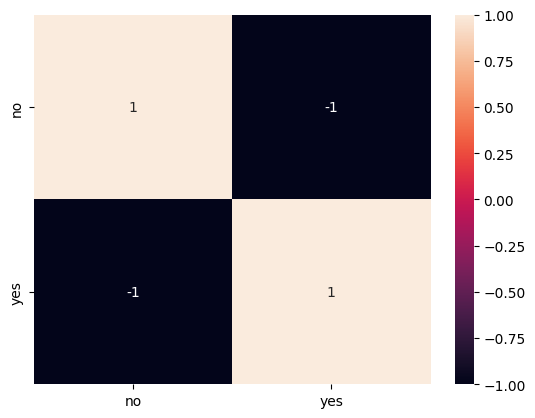

In [26]:
job_dummies = pd.get_dummies(df['default'])
corr = job_dummies.corr(method='pearson')
sns.heatmap(corr, annot=True)
#drop first

- default, housing, loan 경우에 binary result (yes or no) 이기 때문에 완벽한 음수의 상관관계를 가집니다. get_dummies 의 drop_first 파라미터를 통해 변수 하나를 없애주겠습니다.

<Axes: >

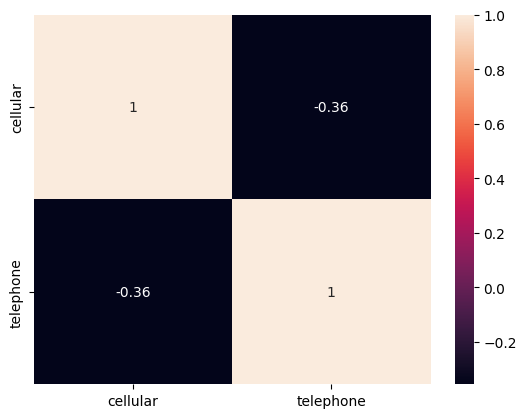

In [27]:
job_dummies = pd.get_dummies(df['contact'])
corr = job_dummies.corr(method='pearson')
sns.heatmap(corr, annot=True)

<Axes: >

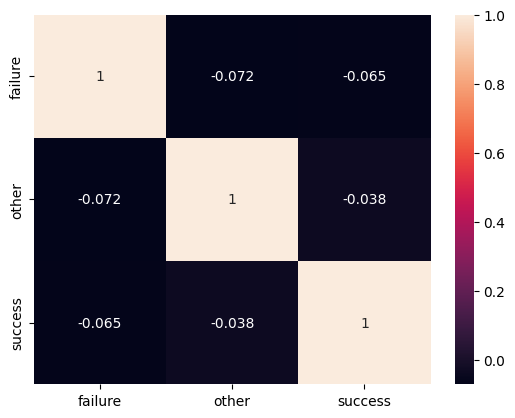

In [28]:
job_dummies = pd.get_dummies(df['poutcome'])
corr = job_dummies.corr(method='pearson')
sns.heatmap(corr, annot=True)

- contact , poutcome 변수는 높은 관계가 나타나지 않으므로 get_dummies 메서드를 사용합니다.

In [29]:
def get_category(X_train:pd.DataFrame, X_test:pd.DataFrame):
    """ 데이터를 전달받아 범주형 변수 더미화하는 함수

    Args:
        X_train (pd.DataFrame): train 데이터프레임
        X_test (pd.DataFrame):  test 데이터프레임

    Returns:
        pd.DataFrame, pd.DataFrmae, list: train, test 데이터프레임, 더미화된 컬럼
    """
    
    #범주형변수
    # 'job','marital','education','default','housing','loan','contact','month','poutcome'
    
    #모듈 import
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    
    # job, month
    column_list = ['job_le', 'month_le']
    le = LabelEncoder()
    X_train['job_le'] = le.fit_transform(X_train['job'])
    X_test['job_le'] = le.fit_transform(X_test['job'])
    X_train['month_le'] = le.fit_transform(X_train['month'])
    X_test['month_le'] = le.fit_transform(X_test['month'])
    
    #reset index
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    
    # marital
    oe = OneHotEncoder(drop=['single'])
    train_oe = oe.fit_transform(X_train[['marital']])
    X_train_marital = pd.DataFrame(train_oe.toarray(), columns=oe.get_feature_names_out())
    test_oe = oe.fit_transform(X_test[['marital']])
    X_test_marital = pd.DataFrame(test_oe.toarray(), columns=oe.get_feature_names_out())
    column_list += oe.get_feature_names_out().tolist()
    
    # education
    oe = OneHotEncoder(drop=['secondary'])
    train_oe = oe.fit_transform(X_train[['education']])
    X_train_edu = pd.DataFrame(train_oe.toarray(), columns=oe.get_feature_names_out())
    test_oe = oe.fit_transform(X_test[['education']])
    X_test_edu = pd.DataFrame(test_oe.toarray(), columns=oe.get_feature_names_out())
    column_list += oe.get_feature_names_out().tolist()
   
    # default, housing, loan
    X_train_dummies_drop_first = pd.get_dummies(X_train[['default', 'housing', 'loan']], drop_first=True)
    X_test_dummies_drop_first = pd.get_dummies(X_test[['default', 'housing', 'loan']], drop_first=True)
    column_list += X_train_dummies_drop_first.columns.to_list()

    # contact, poutcome
    X_train_dummies = pd.get_dummies(X_train[['contact', 'poutcome']])
    X_test_dummies = pd.get_dummies(X_test[['contact', 'poutcome']])
    column_list += X_train_dummies.columns.to_list()

    # 더미화한 변수를 기존 데이터셋에 합치기
    X_train = pd.concat([X_train, X_train_marital, X_train_edu, X_train_dummies_drop_first, X_train_dummies], axis = 1)
    X_test = pd.concat([X_test, X_test_marital, X_test_edu, X_test_dummies_drop_first, X_test_dummies], axis = 1)
    
    return X_train, X_test, column_list
    

X_train, X_test, col_dummies = get_category(X_train,X_test)
X_train

,index,age,job,marital,education,default,balance,housing,loan,contact,...,education_tertiary,education_nan,default_yes,housing_yes,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,24915,0.519481,management,married,tertiary,no,0.774335,yes,no,cellular,...,1.0,0.0,False,True,False,True,False,True,False,False
1,11794,0.376623,services,divorced,secondary,no,0.777363,no,no,NaN,...,0.0,0.0,False,False,False,False,False,False,False,False
2,1279,0.220779,management,single,tertiary,no,0.782495,yes,no,NaN,...,1.0,0.0,False,True,False,False,False,False,False,False
3,913,0.207792,admin.,divorced,secondary,no,0.780818,yes,no,NaN,...,0.0,0.0,False,True,False,False,False,False,False,False
4,5554,0.220779,admin.,single,secondary,no,0.775307,yes,no,NaN,...,0.0,0.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,10010,0.298701,management,single,tertiary,no,0.785529,yes,yes,NaN,...,1.0,0.0,False,True,True,False,False,False,False,False
33904,26216,0.285714,services,single,secondary,no,0.789527,yes,no,cellular,...,0.0,0.0,False,True,False,True,False,False,False,False
33905,15941,0.233766,admin.,single,secondary,no,0.774571,yes,no,cellular,...,0.0,0.0,False,True,False,True,False,False,False,False
33906,16952,0.350649,blue-collar,married,secondary,no,0.775179,yes,no,cellular,...,0.0,0.0,False,True,False,True,False,False,False,False


In [30]:
# 범주형 변수를 이용한 학습&평가
get_score(X_train,X_test, col_dummies)

Logistic Regression


,acc,f1_score
train,0.89,0.26
test,0.89,0.28


Decision Tree


,acc,f1_score
train,0.92,0.52
test,0.88,0.30


Random Forest


,acc,f1_score
train,0.92,0.54
test,0.88,0.31


In [31]:
# 수치형 + 범주형 변수 모두 사용하여 평가
get_score(X_train, X_test, col_dummies + numeric_col)

Logistic Regression


,acc,f1_score
train,0.9,0.42
test,0.9,0.42


Decision Tree


,acc,f1_score
train,1.00,1.00
test,0.87,0.48


Random Forest


,acc,f1_score
train,1.0,1.00
test,0.9,0.48


## 심화 (강의엔 없는내용)
- accuracy score는 높은 반면 f1-score는 낮습니다. 이걸로 볼때 y값이 편향되어있음을 알 수 있습니다.
    - 또한, f1-score는 train에는 100% 확률로 예측한 반면, test는 50% 정도로 터무니 없이 낮습니다. train 데이터에 과적합이 의심됩니다. 

- 이진분류(0,1) 문제는 기본적으로 한쪽으로 찍으면 50%의 확률이 나오기 때문에 50%의 결과는 기본만 못합니다.(비용, 시간 투입고려)
    - 게다가 파이차트로 확인해보니(하단) 대출거절이 기본적인 고객의 패턴입니다.(약 88%)
- 이를 극복하기 위해 y값이 편향되어 있는 문제 해결을 위해 y=1 인 데이터값을 증강하는  oversampling 방법을 수행해보겠습니다

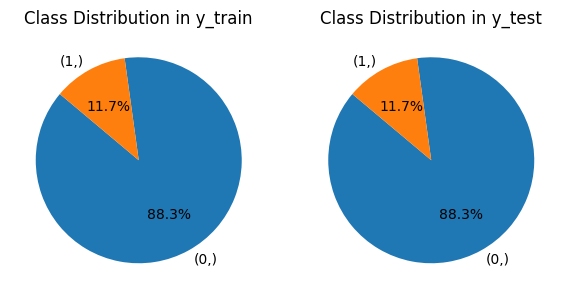

In [32]:
#train, test 데이터의 라벨 수 세기 

y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

datasets = [(y_train, 'Class Distribution in y_train'),
            (y_test, 'Class Distribution in y_test')]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반복문을 사용하여 각 데이터셋의 클래스 분포 시각화
for i, (dataset, title) in enumerate(datasets):
    value_counts = dataset.value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [33]:
#데이터다시 불러오기
df = pd.read_csv('./bank_marketing.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)

#y 라벨 변경
y_train['y'] = y_train['y'].apply(get_binary)
y_test['y'] = y_test['y'].apply(get_binary)

#처음 순서와 다르게 범주형 먼저 인코딩 하여 숫자로 변경
#이유: SMOTE 알고리즘이 기본적으로 수치형변수에 적용되기 때문
X_train, X_test, col_dummies = get_category(X_train,X_test)

# 사용된 범주형 변수는 삭제 
X_train = X_train.drop(columns = category_col)
X_test = X_test.drop(columns = category_col)

- SMOTE 알고리즘을 통한 oversampling 적용

In [34]:
#최초 1회 실행 후 주석처리
#pip install imbalanced-learn

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

- 하기 내용은 이전과 같음

In [36]:
#balance의 값은 음수가 있기 때문에 최소값을 보정함
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 로그스케일 적용
for col in ['balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    
# 수치형 변수 변환
X_train, X_test = get_numeric_sc(X_train, X_test)

In [37]:
get_score(X_train, X_test, col_dummies + numeric_col)

Logistic Regression


,acc,f1_score
train,0.84,0.83
test,0.84,0.83


Decision Tree


,acc,f1_score
train,1.00,1.00
test,0.88,0.88


Random Forest


,acc,f1_score
train,1.00,1.00
test,0.92,0.92


# (선택, 서술형)

- 위 모델링은 데이터 전처리 등 개선할 점이 있습니다. 어떤 부분을 개선하면 좋을까요? 


- 결측치 처리, 이상치 제거로 모델을 최적화 합니다.
- Cross Validation, Grid Search 로 모델을 최적화 합니다.
## 추가 질문
- 왜 X_train, X_test 두개를 따로 나누어서 모든 변수 스케일링/인코딩을 진행할까요? 왜 애초에 df 로 다 처리하고 split 하지 않을까요?
- 수치형 변수 스케일링에 왜 minmax, standard 따로 적용했을까요? 
- 왜 로지스틱회귀는 성능이 떨어질까요?
- 왜 duration, balance, previous 변수만 로그스케일을 적용했을까요?